 ## Agrupando problemas similares no atendimento à clientes

Serão agrupados os problemas de suporte ao cliente em grupos com base em seus atributos. Em seguida, os grupos serão analisados para ver similaridades e diverenças entre eles.

## Carregando o conjunto de dados




In [ ]:
%matplotlib inline

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics

raw_data = pd.read_csv("05_05_issues.csv")
raw_data.dtypes

PROBLEMA_TIPO                    object
CONTAGEM                          int64
MEDIA_CHAMADOS_PARA_RESOLVER    float64
MEDIA_TEMPO_RESOLUCAO             int64
RECORR_TAXA                     float64
SUBSTITUICAO_TAXA               float64
dtype: object

O conjunto de dados contém um registro para cada tipo de problema exclusivo. Tem métricas para cada tipo como contagem, média de chamadas para resolver, tempo médio de resolução etc.

In [ ]:
raw_data.head()

,PROBLEMA_TIPO,CONTAGEM,MEDIA_CHAMADOS_PARA_RESOLVER,MEDIA_TEMPO_RESOLUCAO,RECORR_TAXA,SUBSTITUICAO_TAXA
0,Perda de senha Admin,45,2.3,54,0.15,0.00
1,Windows Reinicia automaticamente,47,3.1,132,0.30,0.03
2,Sistema nao carrega apos reiniciar,12,4.0,154,0.02,0.05
3,Sistema lento,165,1.2,32,0.03,0.00
4,Perda de conexao com a Internet,321,1.0,5,0.21,0.00


## Agrupando dados em clusters por similaridade

Agora usaremos o agrupamento k-médias para agrupar dados com base no seu atributo. Primeiro precisamos determinar o número ideal de grupos. Para isso utilizaremos o Método do Cotovelo para ver onde o Cotovelo ocorre.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Selecionar k com o Método do Cotovelo')

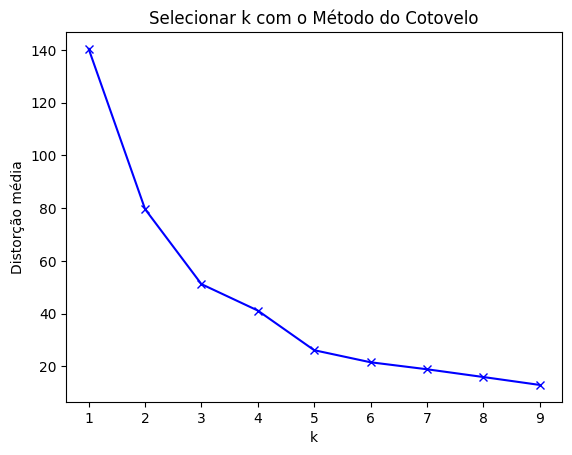

In [ ]:
clust_data = raw_data.drop("PROBLEMA_TIPO",axis=1)

#Encontrando o número ideal de clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clust_data)
    prediction=model.predict(clust_data)
    meanDistortions.append(sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0])

#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção média')
plt.title('Selecionar k com o Método do Cotovelo')


Observando o gráfico, vemos que o joelho ocorre em cluster=3. Esse é o número ideal de clusters.

In [ ]:
#O número ideal de clusters é 3
final_model=KMeans(3)
final_model.fit(clust_data)
prediction=final_model.predict(clust_data)

#Adicionando os clusters previstos nos dados brutos
raw_data["GRUPO"] = prediction
print("Grupos atribuídos : \n")
raw_data[["GRUPO","PROBLEMA_TIPO"]]

Grupos atribuídos : 



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,GRUPO,PROBLEMA_TIPO
0,0,Perda de senha Admin
1,0,Windows Reinicia automaticamente
2,0,Sistema nao carrega apos reiniciar
3,2,Sistema lento
4,1,Perda de conexao com a Internet
5,0,Nova instalacao no aguardo
6,0,Tela branca intermitente
7,2,Muitos popups no navegador
8,2,Impressora nao encontrada
9,0,Falta driver de periferico


## Analisando os grupos
Avaliando os clusters para verificar como os grupos diferem de acordo com várias  características.

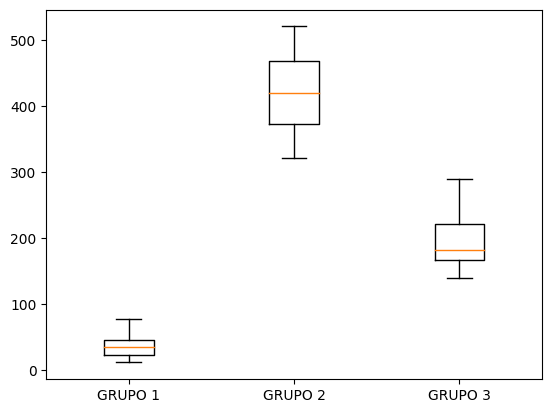

In [ ]:
plt.cla()
plt.boxplot([np.array(raw_data["CONTAGEM"][raw_data.GRUPO==0]),
              np.array(raw_data["CONTAGEM"][raw_data.GRUPO==1]) ,
                np.array(raw_data["CONTAGEM"][raw_data.GRUPO==2]) ],
            labels=('GRUPO 1','GRUPO 2','GRUPO 3'))
plt.show()

Podemos observar que a contagem de incidentes varia de acordo com cada grupos.

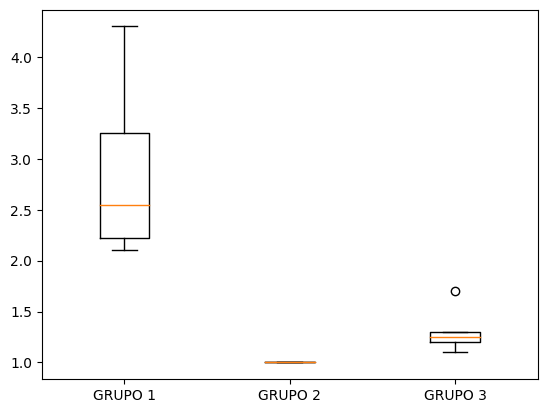

In [ ]:
#Média de chamados para resolver
plt.cla()
plt.boxplot([np.array(raw_data["MEDIA_CHAMADOS_PARA_RESOLVER"][raw_data.GRUPO==0]),
              np.array(raw_data["MEDIA_CHAMADOS_PARA_RESOLVER"][raw_data.GRUPO==1]) ,
                np.array(raw_data["MEDIA_CHAMADOS_PARA_RESOLVER"][raw_data.GRUPO==2]) ],
            labels=('GRUPO 1','GRUPO 2','GRUPO 3'))
plt.show()


O Grupo 2 quase não precisou de tempo para resolver. Isso indica problemas simples e diretos. A empresa precisa analisar esses incidentes e oferecer um caminho de autoatendimento (ajuda de produtos, ajuda online) para o cliente, em vez de desperdiçar o tempo do atendente.

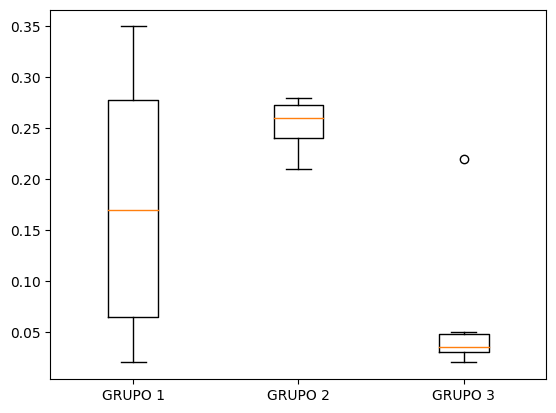

In [ ]:
#Recorrência de problemas
plt.cla()
plt.boxplot([np.array(raw_data["RECORR_TAXA"][raw_data.GRUPO==0]),
              np.array(raw_data["RECORR_TAXA"][raw_data.GRUPO==1]) ,
                np.array(raw_data["RECORR_TAXA"][raw_data.GRUPO==2]) ],
            labels=('GRUPO 1','GRUPO 2','GRUPO 3'))
plt.show()


O grupo 1 tem um índice de recorrência bastante alto. Analisando este conjunto de incidentes vemos como a qualidade do produto pode ser melhorada para evitar que isso aconteça.

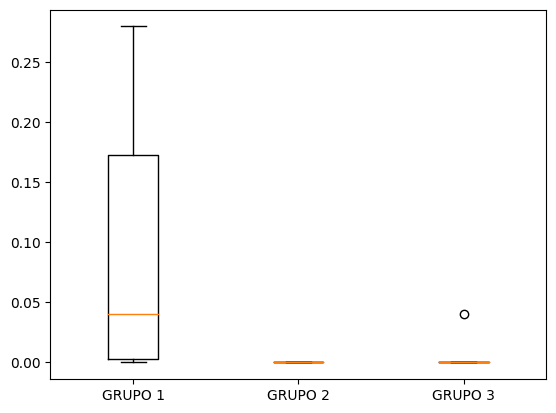

In [ ]:
# Taxa de substituição de produtos
plt.cla()
plt.boxplot([np.array(raw_data["SUBSTITUICAO_TAXA"][raw_data.GRUPO==0]),
              np.array(raw_data["SUBSTITUICAO_TAXA"][raw_data.GRUPO==1]) ,
                np.array(raw_data["SUBSTITUICAO_TAXA"][raw_data.GRUPO==2]) ],
            labels=('GRUPO 1','GRUPO 2','GRUPO 3'))
plt.show()

Os índices de substituição variam muito para o grupo 1. Isso não oferece nenhum parâmetro significativo para agir.

Com isto percebemos que:

- Grupo 1:


    *   Poucos incidentes;
    *   Maior média de indicentes a resolver;
    *   Maior recorrencia de problemas;
    *   Maior taxa de susbstituição de produtos.


- Grupo 2:


    *   Maior número de incidentes;
    *   Menor média de indicentes a resolver;
    *   Alta recorrencia de problemas;
    *   Baixa taxa de susbstituição de produtos.

- Grupo 3:


    *   Quantidade média em número de incidentes;
    *   Baixo número indicentes a resolver;
    *   Menor taxa de recorrencia de problemas entre os grupos;
    *   Baixa taxa de susbstituição de produtos.


